In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import matplotlib.image as mpimg


In [4]:
path = 'dogvscat'
classes = os.listdir(path) 
classes 


['test', 'train']

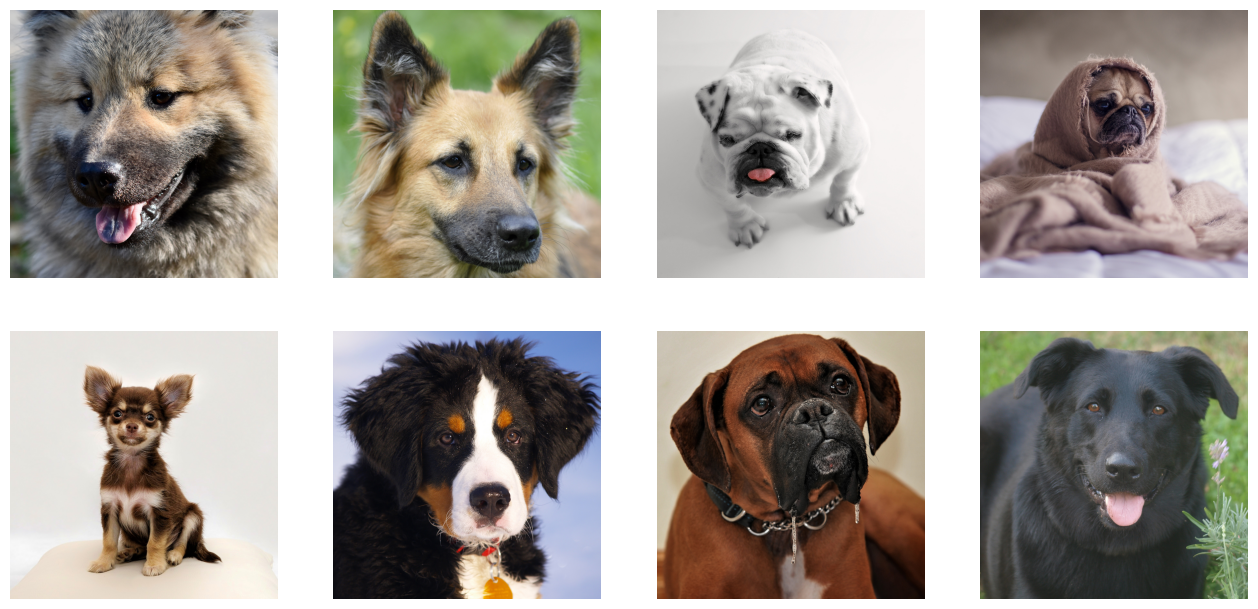

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dogvscat/test/cat')
dog_dir = os.path.join('dogvscat/train/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
               for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname) 
               for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
base_dir = 'dogvscat'

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
image_size=(200,200), 
subset='training', 
seed = 1, 
validation_split=0.1, 
batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
image_size=(200,200), 
subset='validation', 
seed = 1, 
validation_split=0.1, 
batch_size= 32)


Found 550 files belonging to 2 classes.
Using 495 files for training.
Found 550 files belonging to 2 classes.
Using 55 files for validation.


In [7]:
model = tf.keras.models.Sequential([ 
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
layers.MaxPooling2D(2, 2), 
layers.Conv2D(64, (3, 3), activation='relu'), 
layers.MaxPooling2D(2, 2), 
layers.Conv2D(64, (3, 3), activation='relu'), 
layers.MaxPooling2D(2, 2), 
layers.Conv2D(64, (3, 3), activation='relu'), 
layers.MaxPooling2D(2, 2), 

layers.Flatten(), 
layers.Dense(512, activation='relu'), 
layers.BatchNormalization(), 
layers.Dense(512, activation='relu'), 
layers.Dropout(0.1), 
layers.BatchNormalization(), 
layers.Dense(512, activation='relu'), 
layers.Dropout(0.2), 
layers.BatchNormalization(), 
layers.Dense(1, activation='sigmoid') 
]) 


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [9]:
model.compile( 
loss='binary_crossentropy', 
optimizer='adam', 
metrics=['accuracy'] 
) 


In [10]:
history = model.fit(train_datagen, 
epochs=10, 
validation_data=test_datagen) 


Epoch 1/10
16/16 [==============================] - 17s 850ms/step - loss: 0.8436 - accuracy: 0.5636 - val_loss: 11.9306 - val_accuracy: 0.1091
Epoch 2/10
16/16 [==============================] - 13s 800ms/step - loss: 0.6154 - accuracy: 0.6828 - val_loss: 11.5773 - val_accuracy: 0.1091
Epoch 3/10
16/16 [==============================] - 12s 732ms/step - loss: 0.4797 - accuracy: 0.8061 - val_loss: 5.8025 - val_accuracy: 0.1273
Epoch 4/10
16/16 [==============================] - 12s 709ms/step - loss: 0.3743 - accuracy: 0.8768 - val_loss: 2.4206 - val_accuracy: 0.1818
Epoch 5/10
16/16 [==============================] - 13s 774ms/step - loss: 0.3123 - accuracy: 0.9010 - val_loss: 5.6149 - val_accuracy: 0.1636
Epoch 6/10
16/16 [==============================] - 13s 770ms/step - loss: 0.2901 - accuracy: 0.9030 - val_loss: 0.5743 - val_accuracy: 0.8909
Epoch 7/10
16/16 [==============================] - 12s 724ms/step - loss: 0.2366 - accuracy: 0.9253 - val_loss: 0.4147 - val_accuracy: 0.89

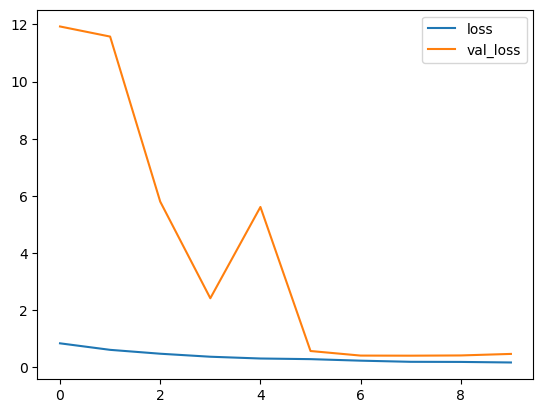

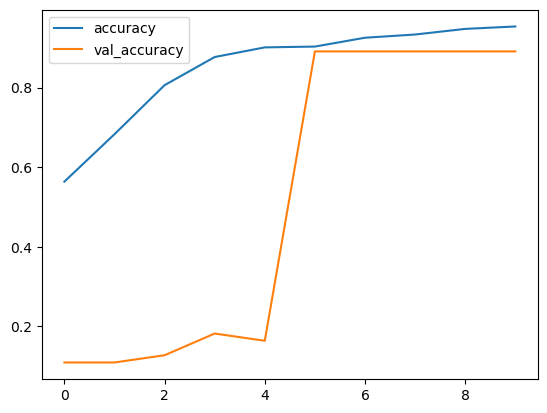

In [11]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


1/1 [==============================] - 0s 181ms/step
dog


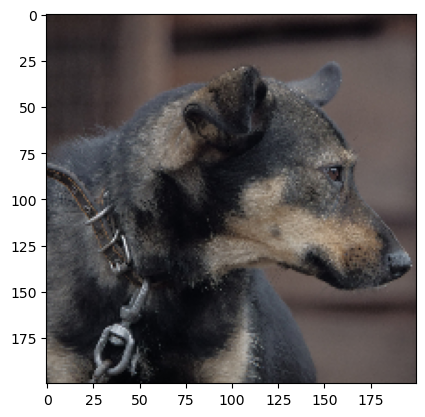

In [12]:
from keras.preprocessing import image



# Input image
test_image = image.load_img('55.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Mapping result array with the main name list
i = 0
if result >= 0.5:
    print("dog")
else:
    print("cat")

1/1 [==============================] - 0s 32ms/step
cat


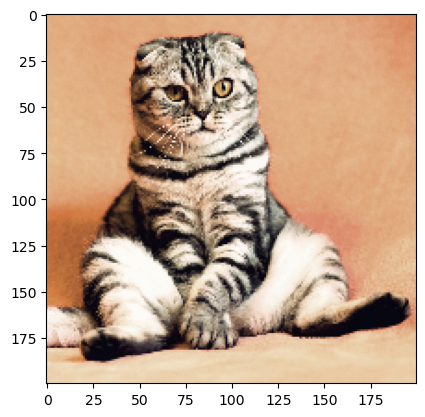

In [13]:
test_image = image.load_img('136.jpg', target_size=(200, 200)) 

# For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 

# Result array 
result = model.predict(test_image) 

# Mapping result array with the main name list 
i=0
if result[0][i] >= 0.5:  # Assuming you want to check the probability of the 'i'th class
    print("cat") 
else: 
    print("dog")

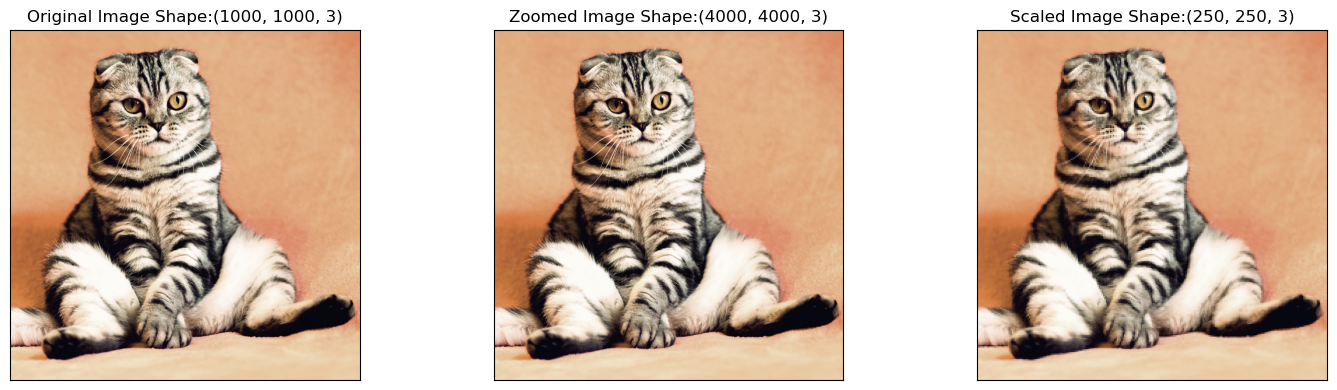

In [10]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('136.jpg')


# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the scale factor
# Increase the size by 3 times
scale_factor_1 = 4.0
# Decrease the size by 3 times
scale_factor_2 = 1/4.0

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new image dimensions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Resize the image
zoomed_image = cv2.resize(src =image_rgb, 
dsize=(new_width, new_height), 
interpolation=cv2.INTER_CUBIC)

# Calculate the new image dimensions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Scaled image
scaled_image = cv2.resize(src= image_rgb, 
dsize =(new_width1, new_height1), 
interpolation=cv2.INTER_AREA)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))

# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))

# Plot the Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


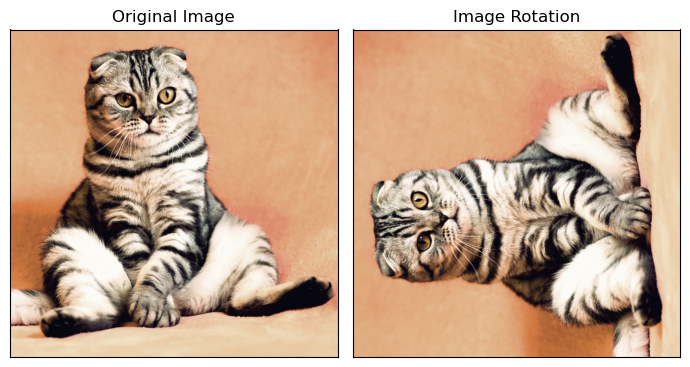

In [11]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread('136.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 90
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


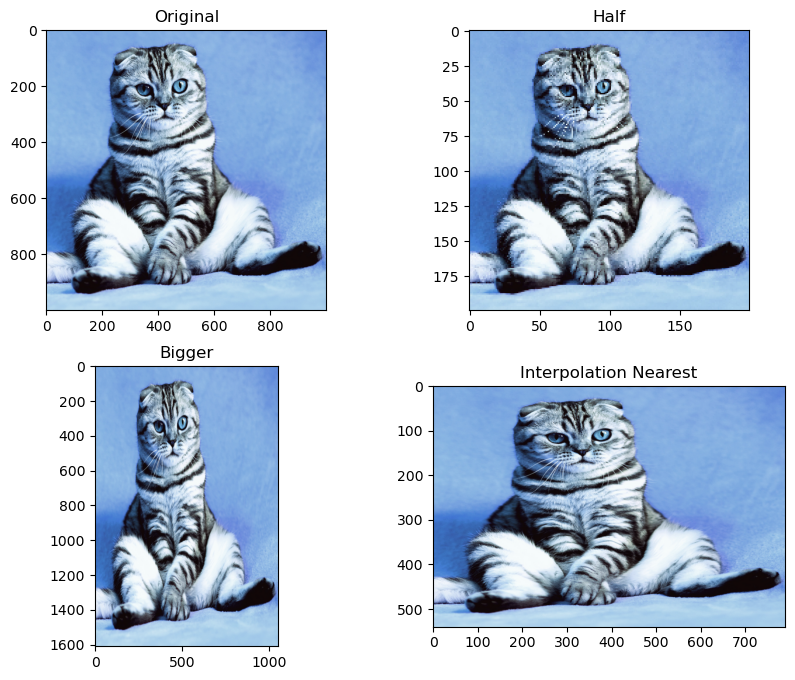

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"dogvscat/train/cat/136.jpg")
half = cv2.resize(image, (0, 0), fx=0.2, fy=0.2)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (790, 540), interpolation=cv2.INTER_LINEAR)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

Titles = ["Original", "Half", "Bigger", "Interpolation Nearest"]
images = [image, half, bigger, stretch_near]
count = 4
for i, (ax, title, img) in enumerate(zip(axs.flat, Titles, images)):
    ax.imshow(img)
    ax.set_title(title)

plt.show()

In [12]:
import cv2

# Load the image
image = cv2.imread('dogvscat/train/cat/136.jpg')

# Apply a Gaussian blur to the image
# The kernel size is set to (50, 50) to make the image completely blurred
blurred_image = cv2.blur(image, (60, 40))

# Display the original image and the blurred image
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()
